In [7]:
import sys, os
import numpy as np
import pandas as pd

try: os.makedirs('sim_inputs')
except: pass

Requirements:
- Python > 3.9
- numpy
- scipy
- pandas
- matplotlib

# Setup ANSYS

Configure ANSYS here: `PyCMM/config/ansys_setup.txt`

# Design of experiments

We create 13 simulations for varying values $f_{sy}$ from 350 to 650.

In [8]:
from PyCMM import preprocess

fsy_arr = np.arange(350, 660, 25)

for fsy in fsy_arr:
    # The parameters need to be parsed as a dictionary.
    # The keys are used as the variable name in the ansys model.
    # 'start_eta': the initial loadstep jumps here. To speed up the simulation.
    parameters = {
        'kRiss_P':      0.1,
        'fsy_P':        fsy,
        'fsu_P':        1.05 * fsy,
        'fcd_P':        59,
        'fck_P':        50,
        'tau_cd':       0.3 * np.sqrt(59),
        'D_max':        32,
        'ecu_P':        -0.002,
        'eu_act_P':     0.100,
        'stepsize_P':   0.10,
        'start_eta':    2.8, 
    }

    preprocess.createSim(
        parameters = parameters, 
        directory = 'sim_inputs',
        model_directory = 'APDLmodelTraglast', # Ansys model to use
        base_name = 'fsy' # Name for the series
    )

# Execute the simulations

The experiments of the $f_{sy}$ series should be run. It is recommended to run this in a terminal.

In [3]:
from PyCMM import batch_executer

batch_executer.runAll(
    folder='sim_inputs',
    parallel=3, # How many simulations are run in paralell
    delete=True, # To delete the big ANSYS files or not
    # tasks=[sim 1, sim 2, etc.] could be used if not the full folder should be run
)

# Load the result of a single simulation

The datastructure of the result is written in `PyCMM/datastructures.py`.
If other data needs to be read, change it there. `PyCMM/postprocess.py` contains the result reader functionalities. If the data to read differs from the model of the Lenzburg overpass, it can be changed there.

In [2]:
from PyCMM import postprocess

data = postprocess.ResultReader('sim_outputs/fsy_005/').readAll()

# Autocompletion should be helpful to localise the data. Some examples are given below:

# Concrete stresses sigma_c3 in top layer:
data.conc.top.sigma_c3
# Concrete stresses sigma_c3 in top layer in the centroid of elements (consistent with shear data and internal forces data):
data.inCentroid(data.conc.top.sigma_c3)
# Steel stress in top layer in y-direction in the centroid of elements:
data.inCentroid(data.steel.top_y.stress)
# Steel stress in top layer in y-direction in the neighbour of element 48:
data.getNeighbour(data.inCentroid(data.steel.top_y.stress), 48)
# Shear demand:
data.shear.v_0d
# Internal forces:
data.mvn.ny

array([   8.78766, -195.05423, -201.17555, -222.75281, -341.96854,
       -339.4856 , -395.44156, -357.32764, -386.70804, -351.87711,
       -385.96432, -346.41644, -404.48459, -353.00195, -428.31668,
       -363.20306, -443.20691, -366.46765, -411.40994, -335.40234,
       -272.90051, -251.99583, -123.38266, -185.40402,  -91.35807,
       -184.17737,  -92.32546, -173.35246,  -68.34241, -151.81259,
       -100.00292, -159.23553, -233.64787, -241.97182, -407.38467,
       -336.11456, -480.24667, -392.74789, -457.30548, -376.86026,
       -417.8783 , -363.12961, -403.95728, -368.58102, -397.92313,
       -382.20404, -391.37009, -360.10818, -140.00301, -326.65274,
         96.55075,  105.53074,   89.36799,   80.6349 ,   75.97274,
         68.46729,   94.60558,  124.66809,  139.71951,  126.65468,
       -130.83301,  -70.2986 ,  -42.13548,  -36.48811,  -36.72153,
        -27.72681,  -39.44404,  -49.72508,  -84.70773, -155.00395,
       -262.59109, -240.91583, -213.00056, -219.41531, -216.36

# Load the entire series

In [13]:
from PyCMM import postprocess

folder = postprocess.LoadFolder().load('sim_outputs')

# The results of the individual simulations are stored in
folder.results

# Dataframe with basic information:
folder.info
# Dataframe with shear failure information:
folder.shear
# Dataframe with all information:
folder.df

name    eta failure_mode  failure_element  kRiss_P  fsy_P   fsu_P  \
0   fsy_000  3.400        STEEL              0.0      0.1  350.0  367.50   
1   fsy_001  3.625        SHEAR            696.0      0.1  375.0  393.75   
2   fsy_002  3.725        SHEAR            439.0      0.1  400.0  420.00   
3   fsy_003  3.750        SHEAR            439.0      0.1  425.0  446.25   
4   fsy_004  3.775        SHEAR            439.0      0.1  450.0  472.50   
5   fsy_005  3.800        SHEAR            439.0      0.1  475.0  498.75   
6   fsy_006  3.700        SHEAR            445.0      0.1  500.0  525.00   
7   fsy_007  3.550        SHEAR            445.0      0.1  525.0  551.25   
8   fsy_008  3.250        SHEAR            449.0      0.1  550.0  577.50   
9   fsy_009  3.250        SHEAR            449.0      0.1  575.0  603.75   
10  fsy_010  3.250        SHEAR            449.0      0.1  600.0  630.00   
11  fsy_011  3.250        SHEAR            449.0      0.1  625.0  656.25   
12  fsy_012  3.250        SHEAR            449.0      0.1  650.0  682.50   

    fcd_P  fck_P  tau_cd  ...  eu_act_P  stepsize_P  start_eta  El_nb  \
0    59.0   50.0  2.3043  ...       0.1         0.1        2.8    295   
1    59.0   50.0  2.3043  ...       0.1         0.1        2.8    295   
2    59.0   50.0  2.3043  ...       0.1         0.1        2.8     38   
3    59.0   50.0  2.3043  ...       0.1         0.1        2.8     38   
4    59.0   50.0  2.3043  ...       0.1         0.1        2.8     38   
5    59.0   50.0  2.3043  ...       0.1         0.1        2.8     40   
6    59.0   50.0  2.3043  ...       0.1         0.1        2.8     44   
7    59.0   50.0  2.3043  ...       0.1         0.1        2.8     44   
8    59.0   50.0  2.3043  ...       0.1         0.1        2.8     48   
9    59.0   50.0  2.3043  ...       0.1         0.1        2.8     48   
10   59.0   50.0  2.3043  ...       0.1         0.1        2.8     48   
11   59.0   50.0  2.3043  ...       0.1         0.1        2.8     48   
12   59.0   50.0  2.3043  ...       0.1         0.1        2.8     48   

            location       v_0d       v_rd     v_aus   theta_0  eps_v06d  
0   [9506.0, 2510.0]  135.01674  134.39622  1.004617 -1.188514       NaN  
1   [9506.0, 2510.0]  142.01411  134.28824  1.057532 -1.204167       NaN  
2    [7566.0, 600.0]  658.29071  653.02891  1.008058 -1.254711  0.000235  
3    [7566.0, 600.0]  667.52714  665.74101  1.002683 -1.277744  0.000208  
4    [7566.0, 600.0]  676.30054  674.37385  1.002857 -1.296828  0.000190  
5    [7954.0, 600.0]  699.10718  694.22947  1.007026 -1.289786  0.000151  
6    [8730.0, 600.0]  713.66728  711.73146  1.002720 -1.311409  0.000119  
7    [8730.0, 600.0]  702.19284  702.16181  1.000044 -1.334216  0.000136  
8    [9506.0, 600.0]  684.40908  681.79322  1.003837 -1.450919  0.000175  
9    [9506.0, 600.0]  685.06356  681.47707  1.005263 -1.451253  0.000176  
10   [9506.0, 600.0]  685.06356  681.47707  1.005263 -1.451253  0.000176  
11   [9506.0, 600.0]  685.06356  681.47707  1.005263 -1.451253  0.000176  
12   [9506.0, 600.0]  685.06356  681.47707  1.005263 -1.451253  0.000176  

[13 rows x 22 columns]

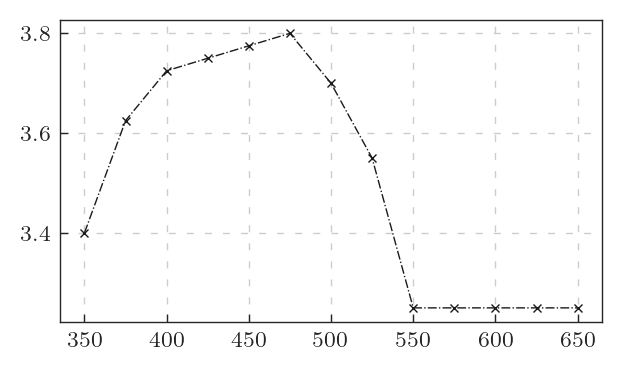

In [10]:
# Quickly plot the critical load factor:
import matplotlib.pyplot as plt
from PyCMM.utilities import setPlotThemeReport

setPlotThemeReport()
fig = plt.figure(figsize=(3.5, 2), dpi=200)
ax = fig.add_subplot(111)

ax.plot(folder.df.fsy_P, folder.df.eta, marker='x', color='k', ls='-.')

# Plotter

All plots can be created and saved as pdf by using `PyCMM.utilities.makePlots()`.

The individual plots are created by using `PyCMM.plotter.MVNPlotter`. The initializer takes a Result data container as input. Here, we use `data`, the data from simulation _fsy_005_.

<AxesSubplot:title={'center':'$m_{y}$ [MNm/m]'}>

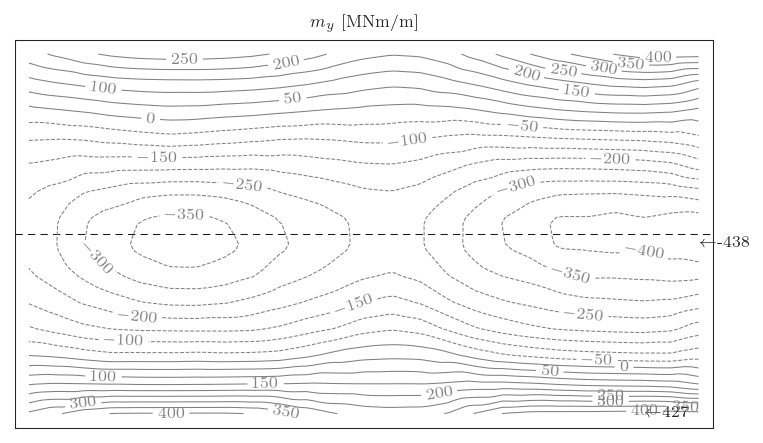

In [11]:
import matplotlib.pyplot as plt
from PyCMM import plotter

plotter = plotter.MVNPlotter(data)

# Contourplots
plotter.plotContour(
    ax = plt.gca(),
    field = 'my',
    steps = 20,
)

<AxesSubplot:title={'center':'$m_{princ}$'}>

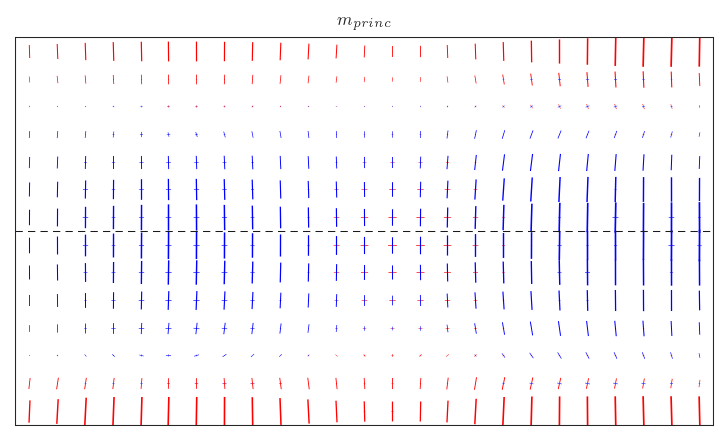

In [52]:
# Principal moment and membrane plots
plotter.plotPrincipal(
    ax = plt.gca(),
    scaling_length = 1,
    field = 'm',
    width = 0.0005,
    width_scaler = 5,
)

<AxesSubplot:title={'center':'$\\sigma_{c3,top} \\ \\mathrm{[N/mm^2]}$'}>

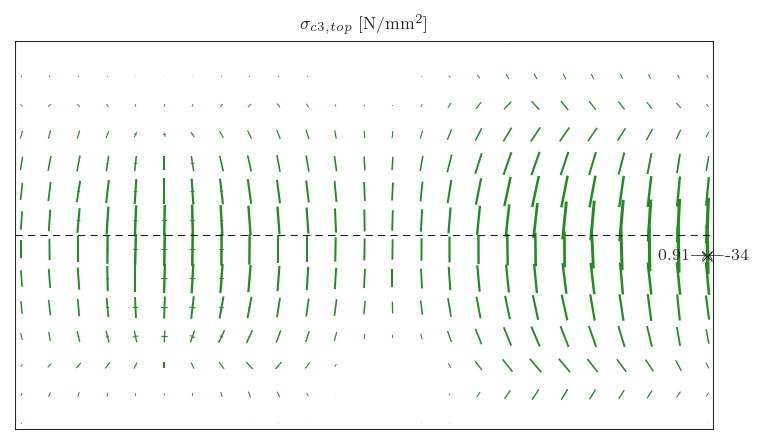

In [55]:
# Concrete plots
plotter.plotConcrete(
    ax = plt.gca(),
    field = 'top',
    scaling_length = 0.05,
    width = 0.001,
    width_scaler = 5,
)

<AxesSubplot:title={'center':'$\\sigma_{sr,top_y} \\ \\mathrm{[N/mm^2]}$'}>

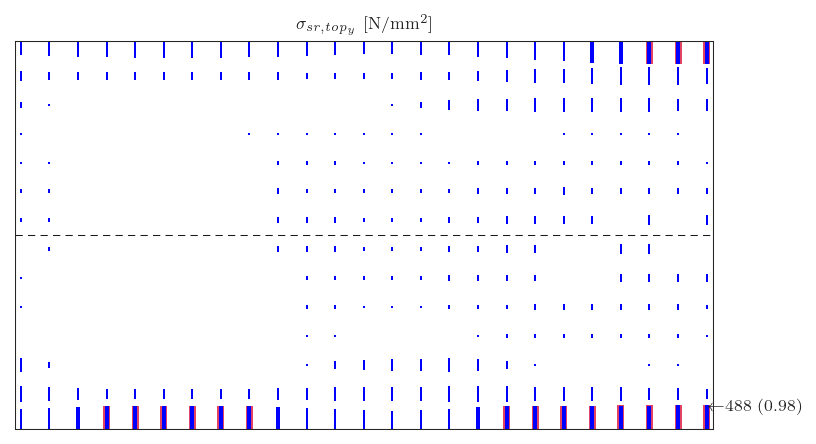

In [66]:
# Steel plots
plotter.plotSteel(
    ax = plt.gca(),
    field = 'top_y',
    scaling_length = 1.0,
    color_yield = 'crimson',
    color_1 = 'blue',
    width = 0.005,
)

<AxesSubplot:title={'center':'$v_{princ}$ mit Ausnutzung'}>

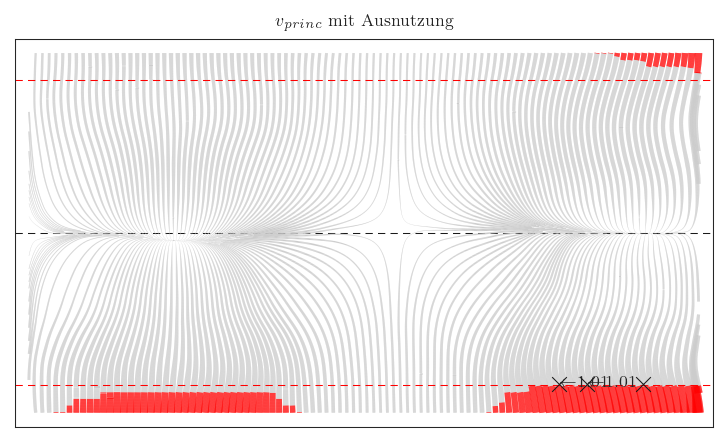

In [74]:
# Shear plots
plotter.plotShearCheck(
    ax = plt.gca(),
    intensity = 5, # Control thickness of streamlines
    density = 20, # Control the smoothness of streamlines
    color_1 = '0.8',
    color_2 = 'red',
    crit_marker_size = 50,
    linewidth = .5,
)

C:\Users\lorez\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:3391: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


<AxesSubplot:title={'center':'$v_{princ}$'}>

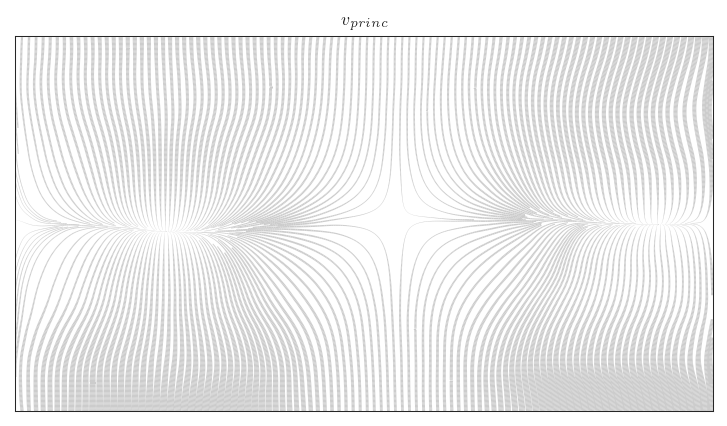

In [12]:
# Shear flow
plotter.plotShearflow(
    ax = plt.gca(),
    intensity = 5, # Control thickness of streamlines
    density = 10, # Control the smoothness of streamlines
    color = '0.8',
    plot_frame = False,
)